In [2]:
import pandas as pd
import numpy as np
import os
import re
import cv2
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = "./10fps_Dataset"

csv_files = sorted(
    [os.path.join(DATA_PATH, f) for f in os.listdir(DATA_PATH) if f.endswith('.csv')],
    key=lambda x: int(re.search(r'\d+', os.path.basename(x)).group())
)

csv_files

['./10fps_Dataset\\pose_landmark_0000.csv',
 './10fps_Dataset\\pose_landmark_0001.csv',
 './10fps_Dataset\\pose_landmark_0002.csv',
 './10fps_Dataset\\pose_landmark_0003.csv',
 './10fps_Dataset\\pose_landmark_0004.csv',
 './10fps_Dataset\\pose_landmark_0005.csv',
 './10fps_Dataset\\pose_landmark_0006.csv',
 './10fps_Dataset\\pose_landmark_0007.csv',
 './10fps_Dataset\\pose_landmark_0008.csv',
 './10fps_Dataset\\pose_landmark_0009.csv',
 './10fps_Dataset\\pose_landmark_0010.csv',
 './10fps_Dataset\\pose_landmark_0011.csv',
 './10fps_Dataset\\pose_landmark_0012.csv',
 './10fps_Dataset\\pose_landmark_0013.csv',
 './10fps_Dataset\\pose_landmark_0014.csv',
 './10fps_Dataset\\pose_landmark_0015.csv',
 './10fps_Dataset\\pose_landmark_0016.csv',
 './10fps_Dataset\\pose_landmark_0017.csv',
 './10fps_Dataset\\pose_landmark_0018.csv',
 './10fps_Dataset\\pose_landmark_0019.csv',
 './10fps_Dataset\\pose_landmark_0020.csv',
 './10fps_Dataset\\pose_landmark_0021.csv',
 './10fps_Dataset\\pose_landmark

In [5]:
SAVE_PATH = "./new_10fps_Dataset/"

for i, csv in enumerate(csv_files):
    # CSV 불러오기
    df = pd.read_csv(csv)

    # 전체 프레임과 랜드마크 ID 목록 생성
    all_frames = np.arange(1, 301)
    all_landmarks = df['landmark_id'].unique()

    df_frames = df["frame"].unique()

    frame_list = []
    landmark_list = []

    for frame in all_frames:
        if frame not in df_frames:
            for landmark in all_landmarks:
                frame_list.append(frame)
                landmark_list.append(landmark)

    add_row = pd.DataFrame({"frame" : frame_list, "landmark_id" : landmark_list})

    df = pd.concat([df, add_row], ignore_index = True)

    df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
    df = df.sort_values(by = ["frame", "landmark_id"])

    df.to_csv(SAVE_PATH + f"pose_landmark_{i:04d}.csv", index = False)


In [ ]:
def draw_landmarks_sequential(video_path, csv_path, resize=(960, 540)):
    df = pd.read_csv(csv_path)
    cap = cv2.VideoCapture(video_path)

    original_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    frame_id = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        landmarks = df[df['frame'] == frame_id]

        for _, row in landmarks.iterrows():
            x = int(row['x'] * original_width)
            y = int(row['y'] * original_height)
            cv2.circle(frame, (x, y), 15, (0, 255, 0), -1)

        if resize:
            frame = cv2.resize(frame, resize)

        cv2.imshow("Pose Replay", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # 1ms로 빠르게 재생
            break

        frame_id += 0.5

    cap.release()
    cv2.destroyAllWindows()

# 예시 실행
VIDEO_PATH = r"F:/Fall_Detection_Data/Source_Data/Video/"
CSV_PATH = "./New_Dataset/"

csv_files = []

for file in os.listdir(CSV_PATH):
    csv_files.append(os.path.join(CSV_PATH, file))

path_list = []

for dirpath, _, filenames in os.walk(VIDEO_PATH):
    for filename in filenames:
        if filename.endswith((".mp4", ".MP4")):
            path_list.append(os.path.join(dirpath, filename))

for i, path in enumerate(path_list):
    draw_landmarks_sequential(path, csv_files[i])

KeyboardInterrupt: 

: 

In [6]:
label_df = pd.read_csv("Label.csv")

label_df

,source_index,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
3267,3267,0
3268,3268,0
3269,3269,0
3270,3270,0


In [62]:
data_df = pd.read_csv("merged_data.csv")

data_df

,frame,landmark_id,x,y,z,source_index
0,1.0,0.0,0.432988,0.559980,-0.354303,0
1,1.0,11.0,0.465422,0.526178,-0.257993,0
2,1.0,12.0,0.408942,0.558263,-0.288992,0
3,1.0,13.0,0.474997,0.550322,-0.326235,0
4,1.0,14.0,0.391634,0.598874,-0.350726,0
...,...,...,...,...,...,...
11532581,300.0,24.0,0.667593,0.452414,0.070728,3270
11532582,300.0,25.0,0.663008,0.559998,-0.021907,3270
11532583,300.0,26.0,0.669412,0.542452,0.192846,3270
11532584,300.0,29.0,0.657363,0.687606,0.059657,3270


In [63]:
label_source_index = label_df["source_index"].unique()
data_source_index = data_df["source_index"].unique()

for i in label_source_index:
    if i not in data_source_index:
        idx = label_df[label_df["source_index"] == i].index
        label_df.drop(idx, axis = 0, inplace = True)



In [64]:
len(label_source_index)

3272

In [65]:
len(data_source_index)

2950

In [66]:
len(label_df)

2950

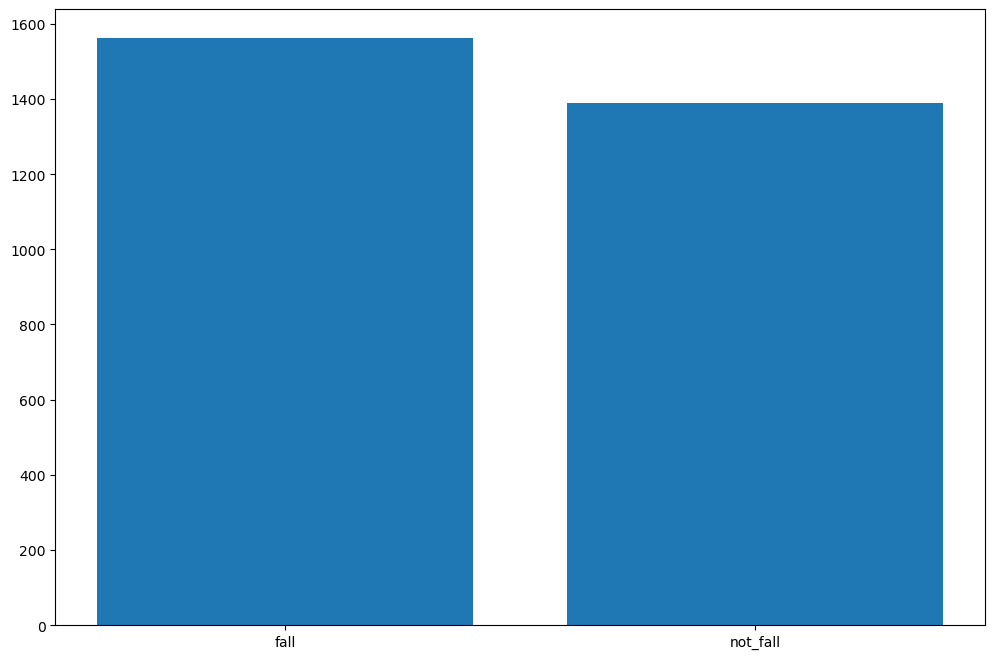

In [67]:
fall = len(label_df[label_df["label"] == 1])
not_fall = len(label_df[label_df["label"] == 0])

plt.figure(figsize = (12, 8))
plt.bar(["fall", "not_fall"], [fall, not_fall])
plt.show()

In [68]:
label_df.to_csv("Label.csv", index = False)